In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
file_name = r'E:\VSO projects\Adjustment visual\input data.xlsx'
data = pd.read_excel(file_name, sheet_name='Data')
df = pd.DataFrame(data)

In [28]:
df.head()

,Desk,Value Date,Adj USD,Reason
0,Algorithmic,2023-11-01,-216079.990742,Algo Nav timing
1,Algorithmic,2023-11-02,-232616.880842,Algo Nav timing
2,Algorithmic,2023-11-03,278349.435676,Algo Nav timing
3,Algorithmic,2023-11-04,40710.786389,Algo Nav timing
4,Algorithmic,2023-11-05,62889.240692,Algo Nav timing


In [29]:
df['Reason'].value_counts()

Reason
Algo Nav timing     92
Proxy Nav Timing    92
Algo Strike          9
Name: count, dtype: int64

In [30]:
df['Value Date'].astype

<bound method NDFrame.astype of 0     2023-11-01
1     2023-11-02
2     2023-11-03
3     2023-11-04
4     2023-11-05
         ...    
188   2024-01-27
189   2024-01-28
190   2024-01-29
191   2024-01-30
192   2024-01-31
Name: Value Date, Length: 193, dtype: datetime64[ns]>

In [31]:
df['Month'] = df['Value Date'].dt.strftime('%b')
print(df['Month'].unique())

['Nov' 'Dec' 'Jan']


C:\Users\farro\AppData\Local\Temp\ipykernel_41512\2111190243.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(tick/1e3)}K' for tick in ax.get_xticks()])
C:\Users\farro\AppData\Local\Temp\ipykernel_41512\2111190243.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(tick/1e3)}K' for tick in ax.get_xticks()])
C:\Users\farro\AppData\Local\Temp\ipykernel_41512\2111190243.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(tick/1e3)}K' for tick in ax.get_xticks()])


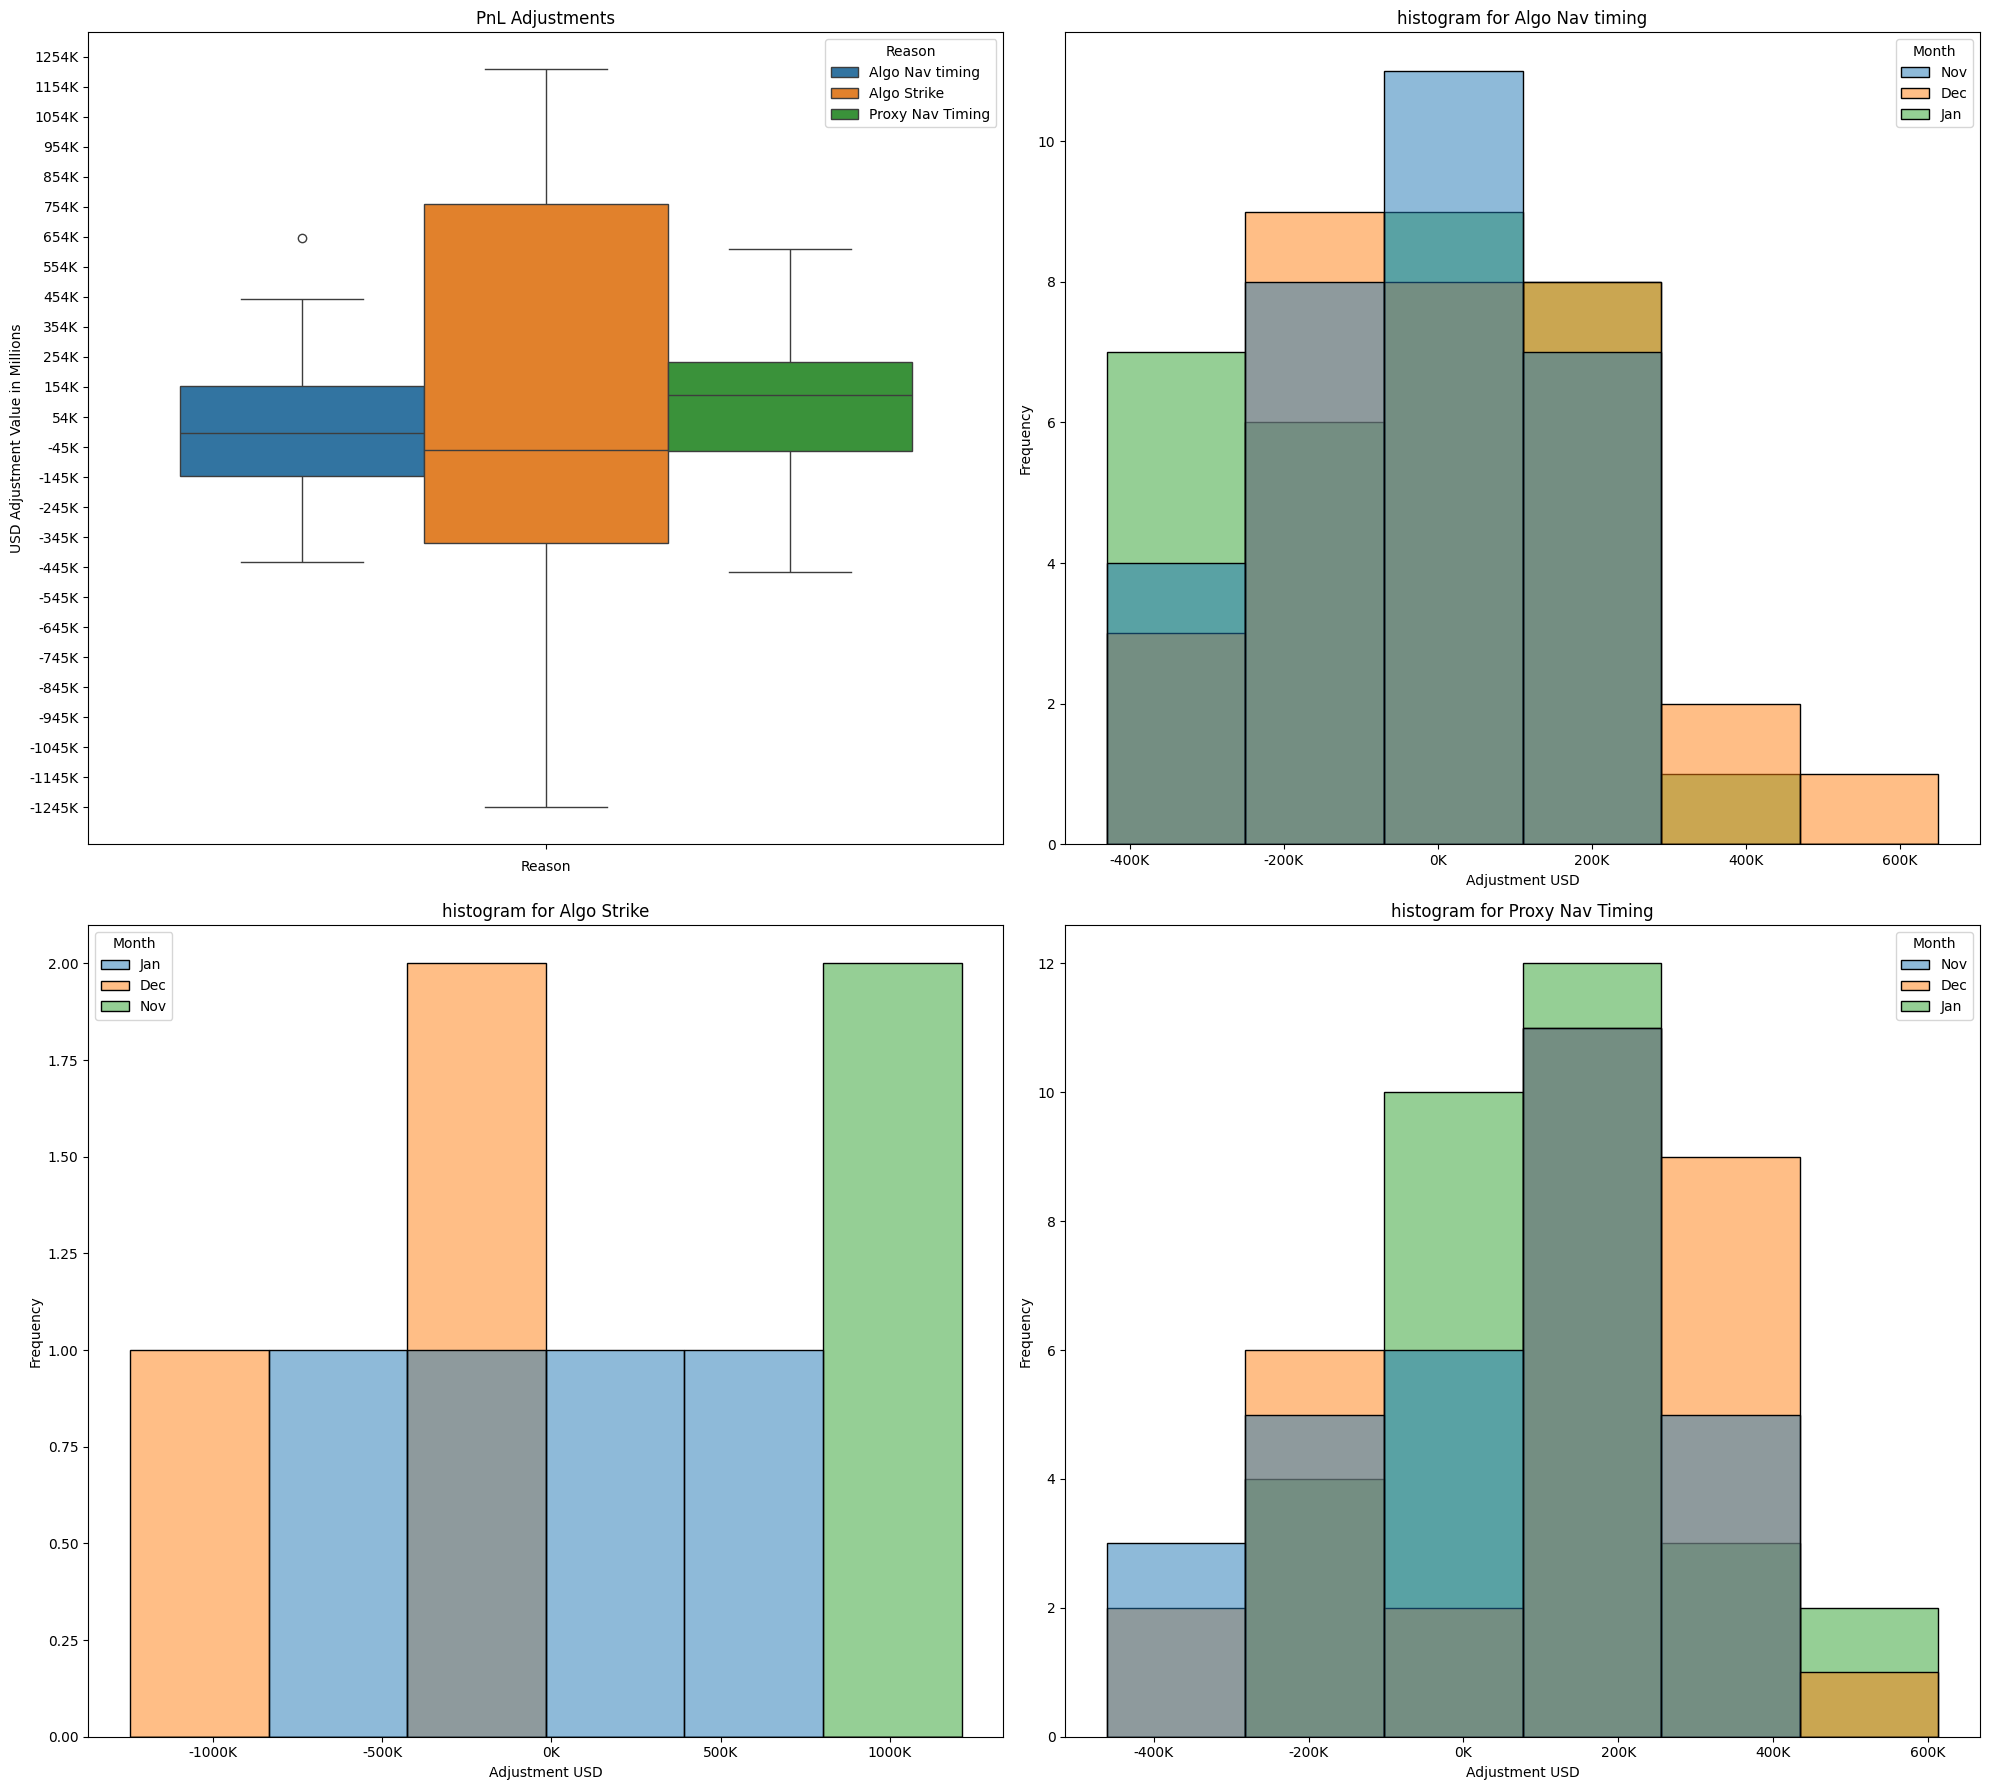

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,18))

unique_reason = df['Reason'].unique()

for i, reason in enumerate(unique_reason):
    ax = axes[(i+1) // 2, (i+1) % 2] 
    sns.histplot(data=df[df['Reason'] == reason], x='Adj USD', bins=6, hue='Month', ax=ax)
    ax.set_title(f'histogram for {reason}')
    ax.set_xticklabels([f'{int(tick/1e3)}K' for tick in ax.get_xticks()])
    ax.set_xlabel('Adjustment USD')
    ax.set_ylabel('Frequency')

ax1 = axes[0,0]
sns.boxplot(y='Adj USD', data = df, hue = 'Reason', ax=ax1)
ax1.set_title('PnL Adjustments')
ax1.set_ylabel('USD Adjustment Value in Millions')
ax1.set_yticks(np.arange(min(df['Adj USD']), max(df['Adj USD']) + 100000, 100000))
ax1.set_yticklabels([f'{int(y/1e3)}K' for y in ax1.get_yticks()])
ax1.set_xlabel('Reason')

plt.tight_layout()
plt.show()